# Sales Data Analysis

## Import the Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns=set()

## Load the Dataset

In [3]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\US Sales.csv")

In [4]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
data.shape

(185950, 11)

## Check Missing Values

In [6]:
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [7]:
data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [19]:
data["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [20]:
data["Order Date"].value_counts()

2019-12-15 20:16:00    8
2019-10-30 21:28:00    7
2019-04-02 13:24:00    7
2019-12-11 13:24:00    7
2019-10-11 19:44:00    6
                      ..
2019-08-06 08:32:00    1
2019-08-18 20:27:00    1
2019-08-30 16:29:00    1
2019-08-15 14:05:00    1
2019-06-25 14:33:00    1
Name: Order Date, Length: 142395, dtype: int64

In [21]:
data["Purchase Address"].value_counts()

193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
716 5th St, San Francisco, CA 94016       7
550 Cherry St, San Francisco, CA 94016    7
                                         ..
339 Forest St, San Francisco, CA 94016    1
344 2nd St, Austin, TX 73301              1
75 Lincoln St, San Francisco, CA 94016    1
675 Cherry St, Atlanta, GA 30301          1
209 11th St, Atlanta, GA 30301            1
Name: Purchase Address, Length: 140787, dtype: int64

In [22]:
data["City"].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

In [30]:
data["Quantity Ordered"].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,185950.0,8340.388475,5450.554093,0.00,3894.00,7786.00,11872.00,25116.0
Order ID,185950.0,230417.569379,51512.737110,141234.00,185831.25,230367.50,275035.75,319670.0
Quantity Ordered,185950.0,1.124383,0.442793,1.00,1.00,1.00,1.00,9.0
Price Each,185950.0,184.399735,332.731330,2.99,11.95,14.95,150.00,1700.0
Month,185950.0,7.059140,3.502996,1.00,4.00,7.00,10.00,12.0
Sales,185950.0,185.490917,332.919771,2.99,11.95,14.95,150.00,3400.0
Hour,185950.0,14.413305,5.423416,0.00,11.00,15.00,19.00,23.0


## Check Duplicate

In [10]:
data.duplicated().sum()

0

## Correlation

In [11]:
data.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_280\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
Unnamed: 0,1.000000,0.357507,-0.003133,0.001471,0.266516,0.001373,-0.000875
Order ID,0.357507,1.000000,0.000702,-0.002857,0.993063,-0.002949,0.001175
Quantity Ordered,-0.003133,0.000702,1.000000,-0.148272,0.000791,-0.139417,-0.002218
Price Each,0.001471,-0.002857,-0.148272,1.000000,-0.003375,0.999203,0.001721
Month,0.266516,0.993063,0.000791,-0.003375,1.000000,-0.003466,0.001731
Sales,0.001373,-0.002949,-0.139417,0.999203,-0.003466,1.000000,0.001668
Hour,-0.000875,0.001175,-0.002218,0.001721,0.001731,0.001668,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_280\2025460966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

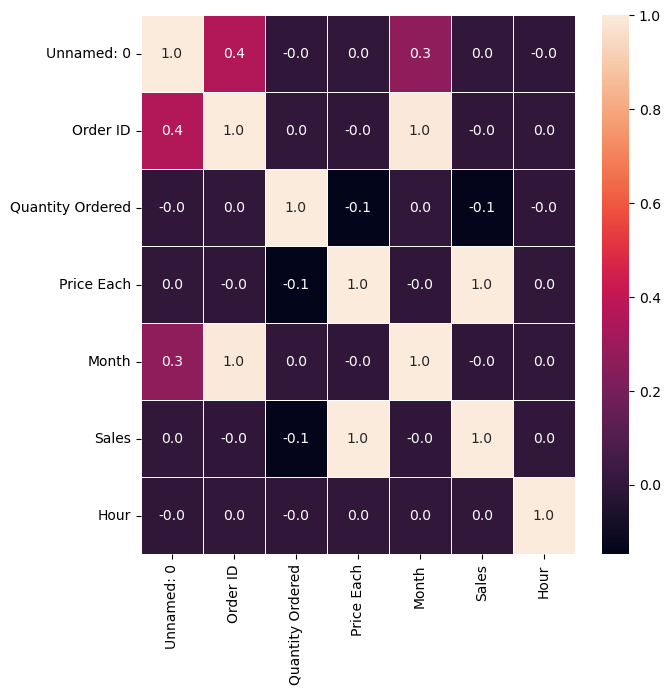

In [18]:
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [23]:
cat_data=data[data.dtypes[data.dtypes=="object"].index]
num_data=data[data.dtypes[data.dtypes!="object"].index]

In [24]:
cat_data.columns

Index(['Product', 'Order Date', 'Purchase Address', 'City'], dtype='object')

In [25]:
num_data.columns

Index(['Unnamed: 0', 'Order ID', 'Quantity Ordered', 'Price Each', 'Month',
       'Sales', 'Hour'],
      dtype='object')

## Elaborate Data Analysis

#### CountPlot

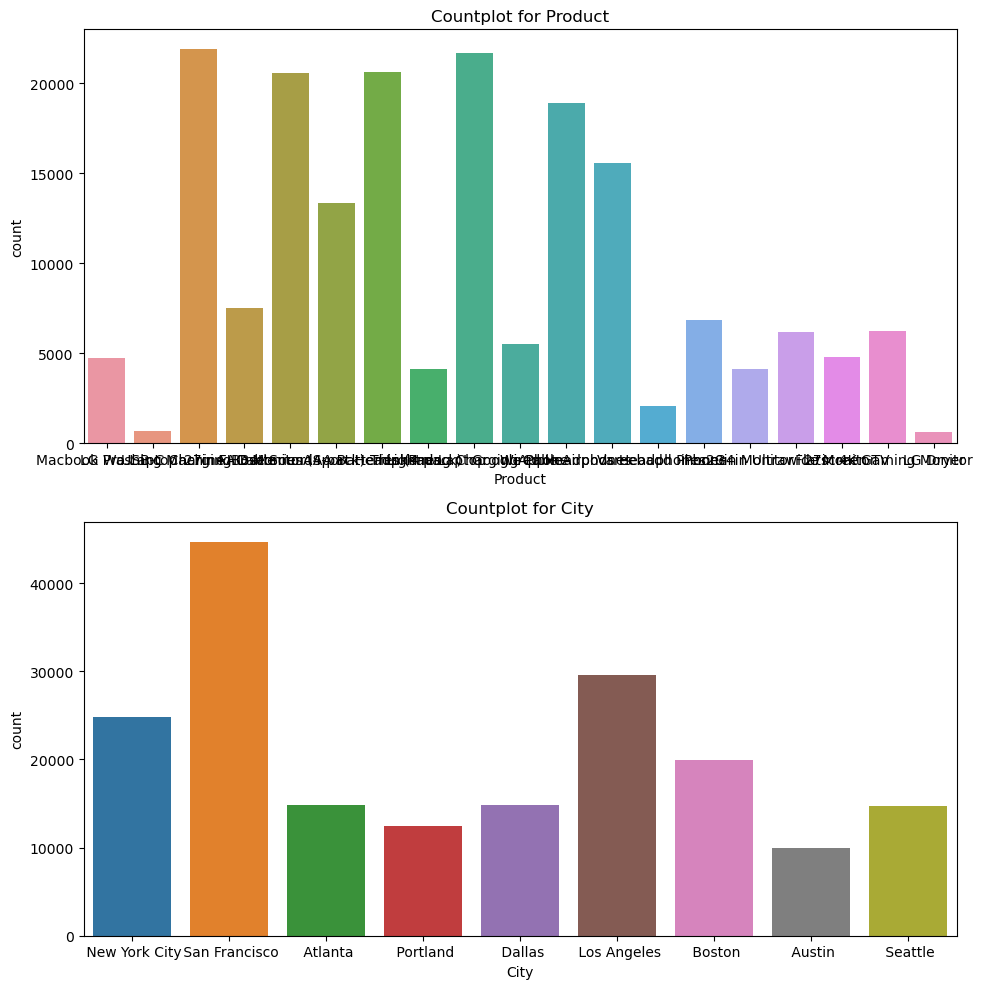

In [27]:
cols = ["Product", "City"]
plt.figure(figsize=(10,10))
for i in range(len(cols)):
    plt.subplot(2,1,i+1)
    sns.countplot(x=data[cols[i]])
    plt.title(f"Countplot for {cols[i]}")
plt.tight_layout()
plt.show()

#### Box Plot

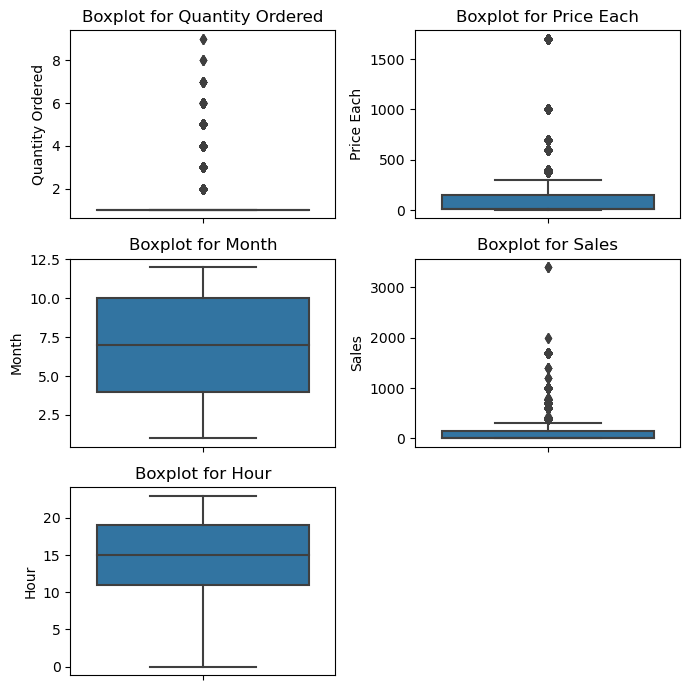

In [29]:
cols = ['Quantity Ordered', 'Price Each', 'Month', 'Sales', 'Hour']
plt.figure(figsize=(7,7))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=num_data[cols[i]])
    plt.title(f"Boxplot for {cols[i]}")
plt.tight_layout()
plt.show()

## Compute Revenue Measures

In [32]:
# Calculate total sales
total_sales = data['Sales'].sum()
print("Total Sales: $", total_sales)

Total Sales: $ 34492035.97


In [33]:
# Analyze sales trends over time (if date column exists)
# Assuming there's a 'Date' column, convert it to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [34]:
# Extract year and month from the 'Date' column
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [35]:
# Group by year and month, and calculate total sales
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

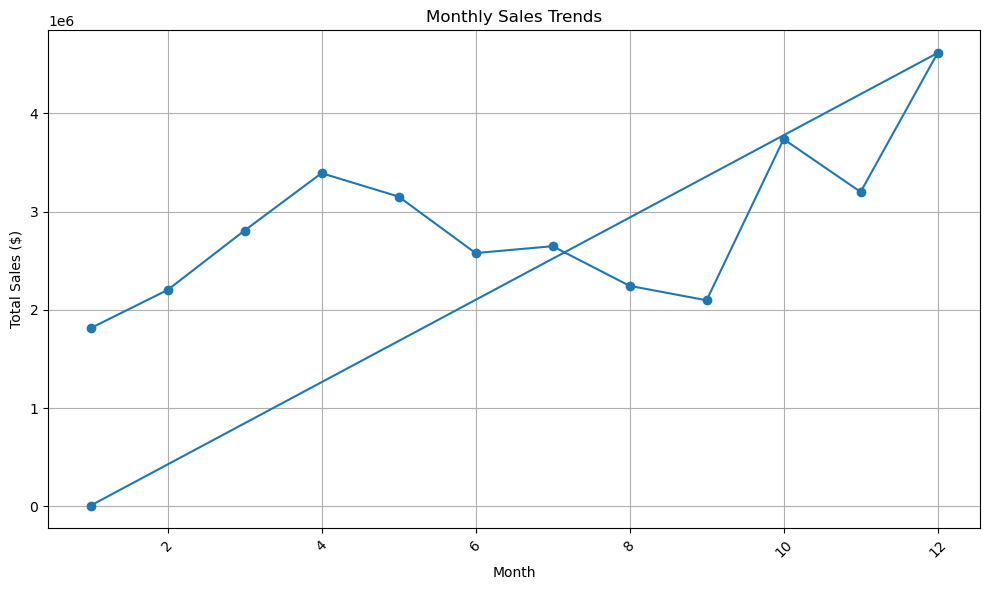

In [36]:
# Plotting sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

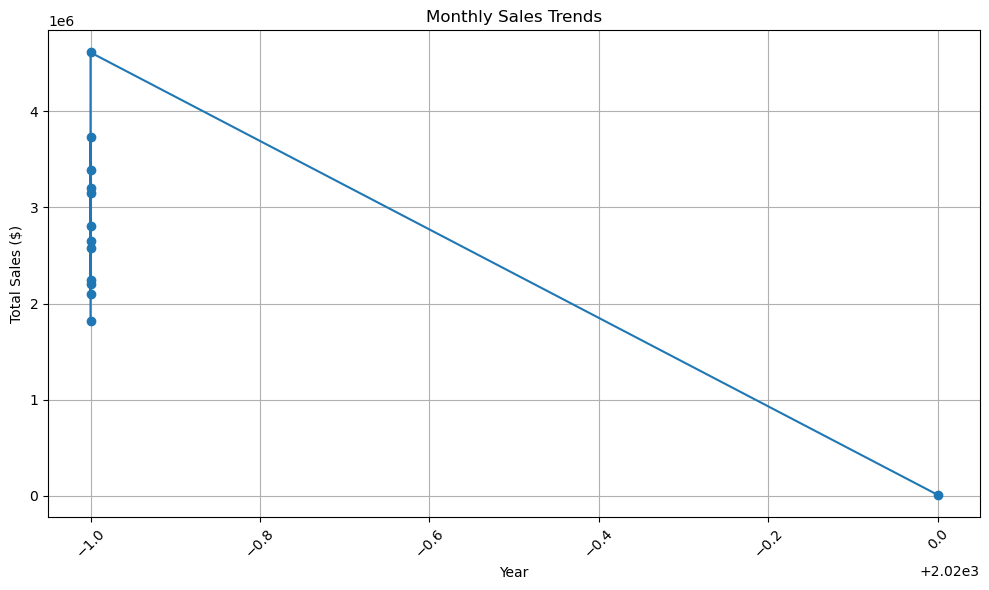

In [37]:
# Plotting sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Determine Best-selling Products

In [40]:
best_selling_products = data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-selling Products:\n", best_selling_products)

Top 10 Best-selling Products:
 Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


## Visualization

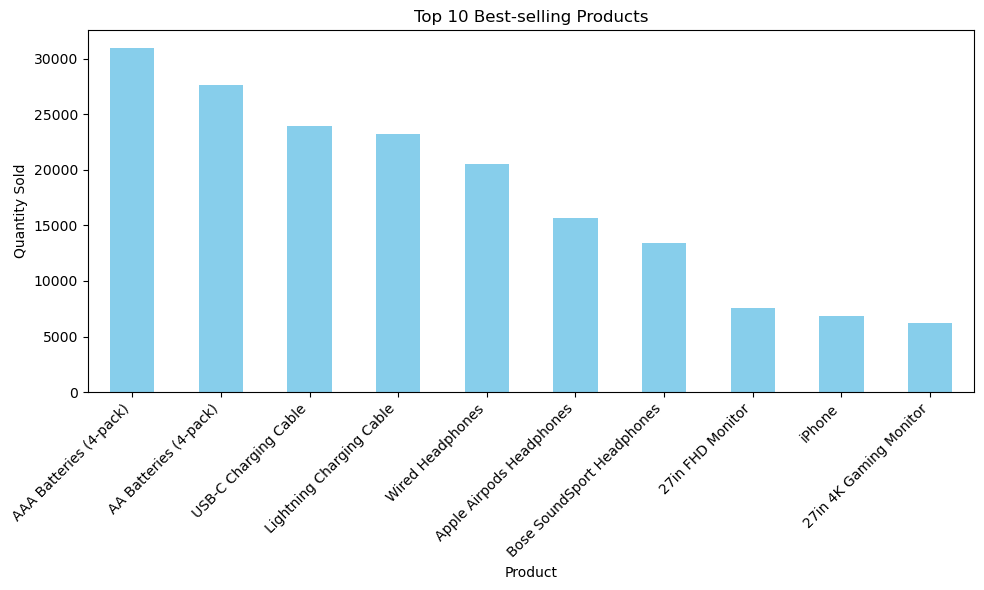

In [41]:
# Plotting best-selling products
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()